# Chapter 6: Pandas exploration

In this chapter we're looking at various ways of investigating data.

(Note: this notebook contains little information. It should be consumed along the powerpoint called "6 Explore".)

First some basic imports and reading the dataset.

In [2]:
import pandas as pd
import numpy as np

df_movies = pd.read_csv("files/IMDB-Movie-Data.csv")
df_movies.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


## An overview in numbers

Get a feel of your data in numbers.

You can use describe() method to find basic statistical characteristics of numerical feature: number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles (can be used to find outliers).

In [3]:
df_movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [4]:
df_movies.describe(include=["object"])

,Title,Genre,Description,Director,Actors
count,1000,1000,1000,1000,1000
unique,999,207,1000,644,996
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,2,50,1,8,2


In [5]:
df_movies.describe(include=["int"])

,Rank,Year,Runtime (Minutes),Votes
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,2012.783000,113.172000,1.698083e+05
std,288.819436,3.205962,18.810908,1.887626e+05
min,1.000000,2006.000000,66.000000,6.100000e+01
25%,250.750000,2010.000000,100.000000,3.630900e+04
50%,500.500000,2014.000000,111.000000,1.107990e+05
75%,750.250000,2016.000000,123.000000,2.399098e+05
max,1000.000000,2016.000000,191.000000,1.791916e+06


In [6]:
pd.set_option("display.max_rows", 6)
df_movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [7]:
pd.set_option("display.max_columns", 4)
df_movies

,Rank,Title,...,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,...,333.13,76.0
1,2,Prometheus,...,126.46,65.0
2,3,Split,...,138.12,62.0
...,...,...,...,...,...
997,998,Step Up 2: The Streets,...,58.01,50.0
998,999,Search Party,...,NaN,22.0
999,1000,Nine Lives,...,19.64,11.0


In [8]:
pd.reset_option("display.max_columns", "display.max_rows")

In [9]:
df_movies["Genre"].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
                           ..
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64

In [10]:
df_movies[[ "Rank","Title" ]].sort_values(by="Rank", ascending=False).head()

,Rank,Title
999,1000,Nine Lives
998,999,Search Party
997,998,Step Up 2: The Streets
996,997,Hostel: Part II
995,996,Secret in Their Eyes


In [11]:
grouped = df_movies.groupby(df_movies.Genre)
df_new = grouped.get_group("Horror,Thriller")
df_new.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
116,117,The Neon Demon,"Horror,Thriller",When aspiring model Jesse moves to Los Angeles...,Nicolas Winding Refn,"Elle Fanning, Christina Hendricks, Keanu Reeve...",2016,118,6.2,50359,1.33,51.0


## Combining Multiple Datasets

Real-world data often comes in multiple pieces. You need to know how to grab those pieces and combine them into one dataset and make it ready for analysis.

In [12]:
import pandas as pd
import numpy as np

In [13]:
city_2022_population = pd.Series({"Kabul": 41128771, "Tirana": 2842321})
city_2022_population

Kabul     41128771
Tirana     2842321
dtype: int64

In [14]:
city_rank = pd.Series([36, 138, 34],index=["Kabul", "Tirana", "Algiers"])
city_rank

Kabul       36
Tirana     138
Algiers     34
dtype: int64

In [15]:
city_data = pd.DataFrame({"Rank": city_rank,"2022 population": city_2022_population})
city_data

,Rank,2022 population
Algiers,34,NaN
Kabul,36,41128771.0
Tirana,138,2842321.0


In [16]:
further_city_data = pd.DataFrame({"Rank": [213, 203], "2022 population":[44273, 79824]},index=["Pago Pago", "Andorra la Vella"])
further_city_data

,Rank,2022 population
Pago Pago,213,44273
Andorra la Vella,203,79824


In [17]:
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data 

,Rank,2022 population
Algiers,34,NaN
Kabul,36,41128771.0
Tirana,138,2842321.0
Pago Pago,213,44273.0
Andorra la Vella,203,79824.0


Exploratory data analysis: you can understand your dataset and answer questions about your dataset:  
e.g. How often do specific values occur in a column? use "value_counts()"

In [18]:
city_countries = pd.DataFrame({
"country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
"capital": [1, 1, 0, 0, 0]},
index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"])
city_countries


,country,capital
Amsterdam,Holland,1
Tokyo,Japan,1
Rotterdam,Holland,0
Toronto,Canada,0
Barcelona,Spain,0


In [19]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities

,Rank,2022 population,country,capital
Algiers,34.0,NaN,NaN,NaN
Kabul,36.0,41128771.0,NaN,NaN
Tirana,138.0,2842321.0,NaN,NaN
...,...,...,...,...
Rotterdam,NaN,NaN,Holland,0.0
Toronto,NaN,NaN,Canada,0.0
Barcelona,NaN,NaN,Spain,0.0


In [20]:
capital_countries = pd.DataFrame({
"Country": ["Afghanistan", "Albania", "Algeria", "American Samoa", "Andorra"],
"Capital": ["Kabul", "Tirana", "Algiers", "Pago Pago", "Andorra la Vella"]},
index=["Kabul", "Tirana", "Algiers", "Pago Pago", "Andorra la Vella"])
capital_countries


,Country,Capital
Kabul,Afghanistan,Kabul
Tirana,Albania,Tirana
Algiers,Algeria,Algiers
Pago Pago,American Samoa,Pago Pago
Andorra la Vella,Andorra,Andorra la Vella


In [21]:
capitals = pd.concat([all_city_data, capital_countries], axis=1, sort=False)
capitals

,Rank,2022 population,Country,Capital
Algiers,34,NaN,Algeria,Algiers
Kabul,36,41128771.0,Afghanistan,Kabul
Tirana,138,2842321.0,Albania,Tirana
Pago Pago,213,44273.0,American Samoa,Pago Pago
Andorra la Vella,203,79824.0,Andorra,Andorra la Vella


In [22]:
countries = pd.DataFrame({
"population_millions": [17, 127, 37],
"continent": ["Europe", "Asia", "North America"]
}, index= ["Holland", "Japan", "Canada"])
countries


,population_millions,continent
Holland,17,Europe
Japan,127,Asia
Canada,37,North America


In [23]:
pd.merge(cities, countries, left_on="country", right_index=True)

,Rank,2022 population,country,capital,population_millions,continent
Amsterdam,NaN,NaN,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,NaN,NaN,Japan,1.0,127,Asia
Toronto,NaN,NaN,Canada,0.0,37,North America


## Reformat data

Data isn’t always nice and rectangular. You can reformat your data into the form you need.

In [33]:
df = pd.DataFrame({"Name": ["Tom", "Glen", "Sara", "Kian"],
                   "2018": [3, 4, 5, 3],
                   "2019": [4, 3, 2, 1],
                   "2020": [2, 4, 4, 3]})
df

,Name,2018,2019,2020
0,Tom,3,4,2
1,Glen,4,3,4
2,Sara,5,2,4
3,Kian,3,1,3


In [34]:
df_melt = df.melt(id_vars="Name",var_name="Year",value_name="Courses")
df_melt

,Name,Year,Courses
0,Tom,2018,3
1,Glen,2018,4
2,Sara,2018,5
3,Kian,2018,3
4,Tom,2019,4
5,Glen,2019,3
6,Sara,2019,2
7,Kian,2019,1
8,Tom,2020,2
9,Glen,2020,4


In [35]:
df_pivot = df_melt.pivot(index="Name",columns="Year",values="Courses")
df_pivot

Year,2018,2019,2020
Name,,,
Glen,4,3,4
Kian,3,1,3
Sara,5,2,4
Tom,3,4,2


In [36]:
df = pd.DataFrame({"Season": ["Summer", "Summer", "Summer", "Summer", "Summer","Winter", "Winter", "Winter", "Winter"],
                   "Feel": ["warm", "normal", "warm", "normal", "warm","cold", "normal", "cold", "normal"],
                   "Day_Time": ["lang", "lang", "lang", "lang","lang", "short", "short", "short","short"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,Season,Feel,Day_Time,D,E
0,Summer,warm,lang,1,2
1,Summer,normal,lang,2,4
2,Summer,warm,lang,2,5
3,Summer,normal,lang,3,5
4,Summer,warm,lang,3,6
5,Winter,cold,short,4,6
6,Winter,normal,short,5,8
7,Winter,cold,short,6,9
8,Winter,normal,short,7,9


In [37]:
table = pd.pivot_table(df, values='D', index=['Season', 'Feel'],columns=['Day_Time'], aggfunc=np.sum)
table

Day_Time       lang  short
Season Feel               
Summer normal   5.0    NaN
       warm     6.0    NaN
Winter cold     NaN   10.0
       normal   NaN   12.0

In [38]:
table = pd.pivot_table(df, values=['D', 'E'], index=['Season', 'Day_Time'],aggfunc={'D': np.mean,'E': np.mean})
table

,,D,E
Season,Day_Time,,
Summer,lang,2.2,4.4
Winter,short,5.5,8.0


In [39]:
df_pivot = pd.read_csv("files/sample_pivot.csv", delimiter=';')
print(df_pivot.head())

         Date Region                 Type  Units  Sales
0  11/07/2020   East  Children's Clothing   18.0    306
1  23/09/2020  North  Children's Clothing   14.0    448
2   2/04/2020  South     Women's Clothing   17.0    425
3  28/02/2020   East  Children's Clothing   26.0    832
4  19/03/2020   West     Women's Clothing    3.0     33


In [40]:
pd.crosstab(df_pivot.Region, df_pivot.Type)

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,113,122,176
North,85,89,142
South,45,39,53
West,42,41,53


In [41]:
pd.crosstab(index = df_pivot.Region, columns = df_pivot.Type, values = df_pivot.Sales, aggfunc = 'mean')

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,405.743363,423.647541,399.028409
North,438.894118,449.157303,432.528169
South,412.666667,475.435897,418.924528
West,480.523810,465.292683,419.188679


## An overview in graphs

When doing data science, which implies you have no or limited domain knowledge, you get to know the data by making graphs. These graphs raise questions, that spark more graphs.

(And the picture in the slide: [this movie](https://www.imdb.com/title/tt1596363/?ref_=nm_flmg_act_10))

In [28]:
# new dataset:
df = pd.read_csv("files/mpg.csv", index_col=0)  
df.head(10) 

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
7,8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


We'll start by using [the best](https://www.data-to-viz.com/caveat/pie.html) graph in the world; the pie chart. There really isn't anything in the world a pie chart can't explain.

<AxesSubplot:ylabel='model'>

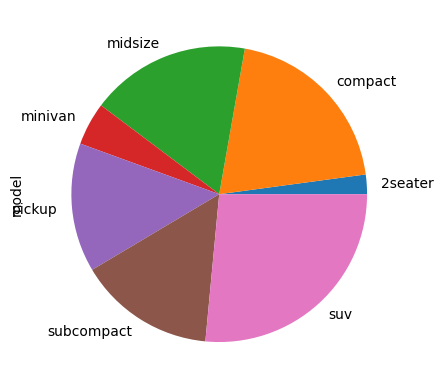

In [29]:
df.groupby("class").count().plot(kind="pie", y="model", legend=False)

Next, we look at how two variables relate to each other. This can be done using a scatterplot.

We'll map the highway miles per gallon vs the engine displacement (how big the engine is).

<AxesSubplot:xlabel='displ', ylabel='hwy'>

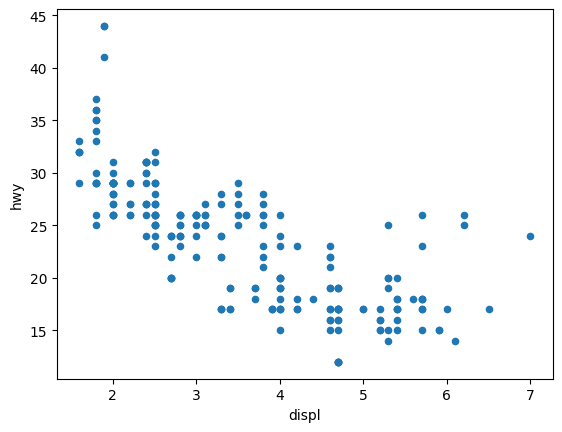

In [30]:
df.plot(x="displ", y="hwy", kind="scatter")

This is a scatterplot. It scatters the datapoints around the field. You can use the following types of graph:


1. "area" is for area plots.
1. "bar" is for vertical bar charts.
1. "barh" is for horizontal bar charts.
1. "box" is for box plots.
1. "hexbin" is for hexbin plots.
1. "hist" is for histograms.
1. "kde" is for kernel density estimate charts.
1. "density" is an alias for "kde".
1. "line" is for line graphs.
1. "pie" is for pie charts.
1. "scatter" is for scatter plots.

You could also import matplotlib separately and show the graphs from there.

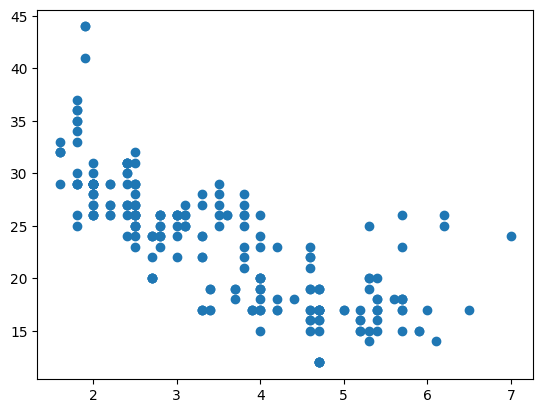

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df["displ"], df["hwy"])
plt.show()

Maybe the class of the car has an impact on this graph. Could we color the dots according to the class?

[Text(0.5, 0, 'Engine displacement'),
 Text(0, 0.5, 'Highway miles per gallon'),
 Text(0.5, 1.0, 'About cars')]

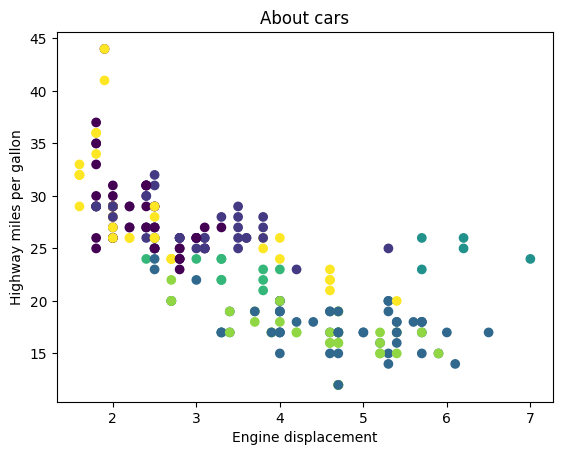

In [32]:
plt.scatter(df.displ, df.hwy, c=pd.factorize(df['class'])[0])
plt.gca().set(xlabel='Engine displacement', ylabel='Highway miles per gallon', title='About cars')

Good, but what do the colors stand for?

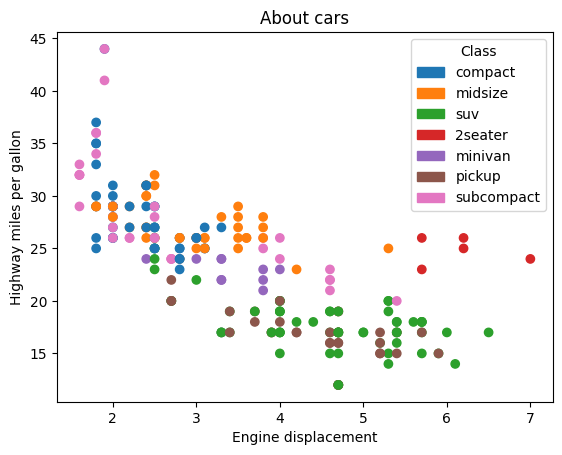

In [33]:
import matplotlib.patches

levels, categories = pd.factorize(df['class'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.scatter(df.displ, df.hwy, c=colors)
plt.gca().set(xlabel='Engine displacement', ylabel='Highway miles per gallon', title='About cars')
plt.legend(handles=handles, title='Class')

There seems to be something of a trend in this data. Could we show this?

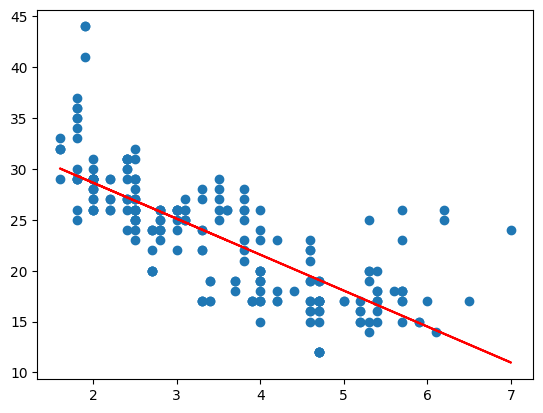

In [34]:
# https://www.statology.org/matplotlib-trendline/

import numpy as np

plt.scatter(df.displ, df.hwy)

#calculate equation for trendline
z = np.polyfit(df.displ, df.hwy, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(df.displ, p(df.displ), color="red")

Maybe a second order trendline? This means the equation for calculating it is in x², not just in x. It's slightly curved, and the more orders you give it the more curvy it gets. (With the risk of overfitting, but that's a different story.)

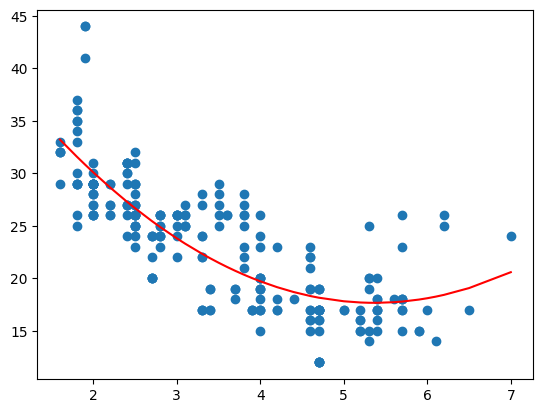

In [35]:
# https://www.statology.org/matplotlib-trendline/

plt.scatter(df.displ, df.hwy)

#calculate equation for trendline
z = np.polyfit(df.displ, df.hwy, 2)
p = np.poly1d(z)

#add trendline to plot
plt.plot(df.displ.sort_values(), p(df.displ.sort_values()), color="red")

In [42]:
import pandas as pd
# index of the dataframe
idx = ['1', '2', '3', '4']
# columns of the dataframe
cols = ['First','Second','Third','Fourth']
# values of the dataframe
df = pd.DataFrame([[0, 10, 20, 30], [25, 15, 4, 10],
                   [15, 4, 30, 108], [14, 21, 28, 35]],
                   columns = cols, index = idx)
  
# pairwise correlation
corr = df.corr()
corr.style.background_gradient(cmap ='coolwarm')

,First,Second,Third,Fourth
First,1.000000,0.242055,-0.452738,-0.083559
Second,0.242055,1.000000,-0.222238,-0.720456
Third,-0.452738,-0.222238,1.000000,0.729100
Fourth,-0.083559,-0.720456,0.729100,1.000000


In [43]:
#import sys
#!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import profile_report
import pandas as pd
df_cycling = pd.read_csv('files/cycling_data.csv', index_col=0, parse_dates=True).dropna()
df_cycling.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
df_cycling = pd.read_csv('files/cycling_data.csv', index_col=0, parse_dates=True).dropna()
df_cycling

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
2019-09-16 13:57:48,Morning Ride,Ride,2272,12.45,Rested after the weekend!
2019-09-17 00:15:47,Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
2019-09-17 13:43:34,Morning Ride,Ride,2285,12.60,Raining
2019-09-18 13:49:53,Morning Ride,Ride,2903,14.57,Raining today


array([[<AxesSubplot:xlabel='Time', ylabel='Time'>,
        <AxesSubplot:xlabel='Distance', ylabel='Time'>],
       [<AxesSubplot:xlabel='Time', ylabel='Distance'>,
        <AxesSubplot:xlabel='Distance', ylabel='Distance'>]], dtype=object)

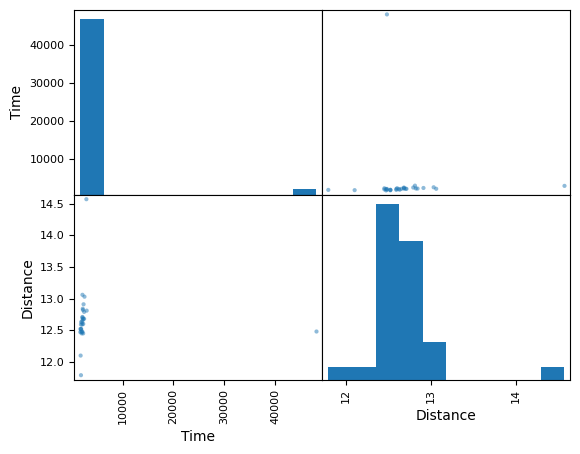

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_cycling)

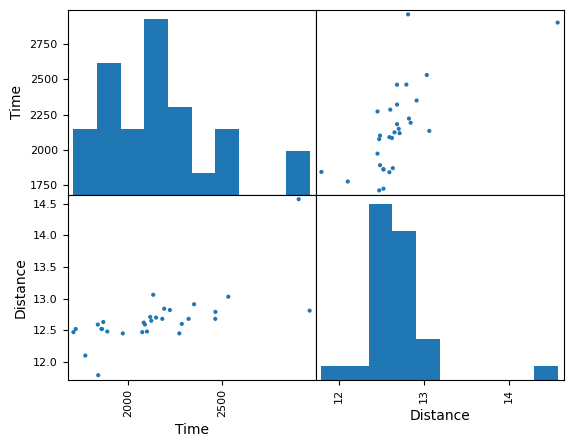

In [47]:
scatter_matrix(df_cycling.query('Time < 4000'), alpha=1);

Note how we had to sort the values before plotting them? That's because the line wants to follow the data, so the data has to be sorted. Remove it to see what happens!

More information:

* [realpython.com/pandas-plot-python/](https://realpython.com/pandas-plot-python/)

## Boxplots and skewing

After comparing two variables, we'll be looking at just one variable at the time. This is done using a histogram or a boxplot.

(array([17., 48., 26., 27., 61., 40.,  7.,  5.,  0.,  3.]),
 array([12. , 15.2, 18.4, 21.6, 24.8, 28. , 31.2, 34.4, 37.6, 40.8, 44. ]),
 <BarContainer object of 10 artists>)

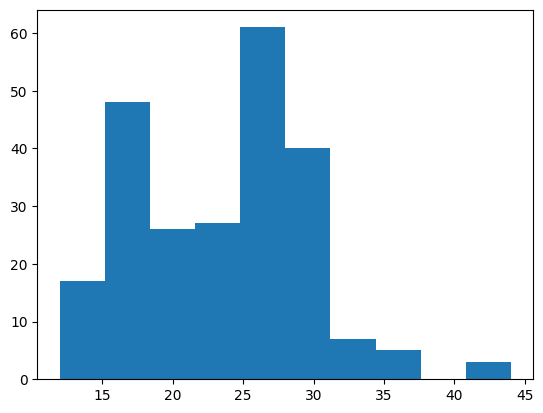

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df.hwy)

A very important consideration in this type of diagram is the bin width. It determines how many values are taken together. A small bin width would give you very detailed information, a large one gives more of a general overview. As in all graphs this also is subject to many rules, like the [Freedman–Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule).

Let's show multiple diagrams at once using a subplot.

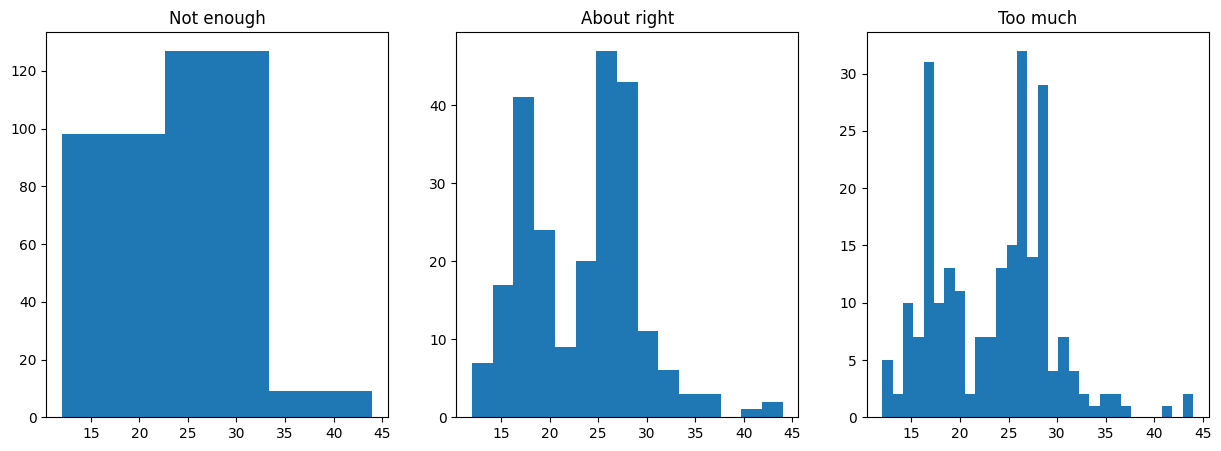

In [ ]:
figure, axis = plt.subplots(1, 3, figsize=(15,5))
# plt.figure(figsize=(1, 3))

axis[0].hist(df.hwy, bins=3)
axis[0].title.set_text("Not enough")
axis[1].hist(df.hwy, bins=15)
axis[1].title.set_text("About right")
axis[2].hist(df.hwy, bins=30)
axis[2].title.set_text("Too much")

plt.show()

These diagrams look way nicer when using data that actually has a normal distribution, like the average length of a group of people, or the weight of cars, or the lifespan of a raccoon in the wild.

Let's generate some nice data and show it in a histogram and a boxplot.

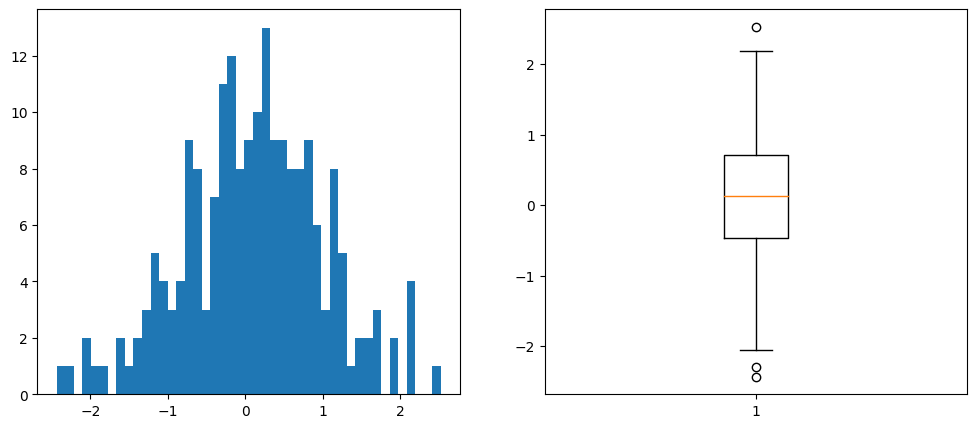

In [ ]:
np.random.seed(1) # set the basis for the random-engine. This number makes sure the same random numbers are always generated.

data = np.random.normal(loc=0, scale=1, size=200)

figure, axis = plt.subplots(1, 2, figsize=(12,5))

axis[0].hist(data, 45)
axis[1].boxplot(data)
plt.show()


A boxplot is a much easier way of looking at a normal distribution. It shows:

* the centerline (the red line, the median or middle value)
* the main body (the actual box, 50% of all samples are here)
* the whiskers (the line next to the box, with 25% above and 25% below the middle box)
* the outliers (the dots, data that is not within the expected range)

Boxplots are easier to analyse than histograms when you have multiple categories, like with our cars. What is the engine displacement when separated by type (or class) of car?

class
2seater       AxesSubplot(0.125,0.11;0.775x0.77)
compact       AxesSubplot(0.125,0.11;0.775x0.77)
midsize       AxesSubplot(0.125,0.11;0.775x0.77)
minivan       AxesSubplot(0.125,0.11;0.775x0.77)
pickup        AxesSubplot(0.125,0.11;0.775x0.77)
subcompact    AxesSubplot(0.125,0.11;0.775x0.77)
suv           AxesSubplot(0.125,0.11;0.775x0.77)
Name: displ, dtype: object

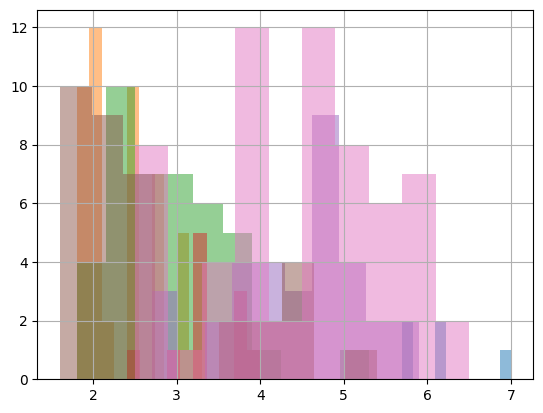

In [ ]:
df.groupby('class').displ.hist(alpha=0.5)

A small command but generally unusable graph. But what would that look like using multiple boxplots?

By the way: up until now we've been rigidly using only matplotlib. That's because it is the basic package that started it all. Now we'll take a step up and start using seaborn, which is based on matplotlib but is easier to use and has more functionality. You could, as an exercise, try to get this plot using only matplotlib.

In [ ]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\Jochen\OneDrive - Thomas More\_Vakken\Data Science\Datascience2022\venv\Scripts\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:xlabel='class', ylabel='displ'>

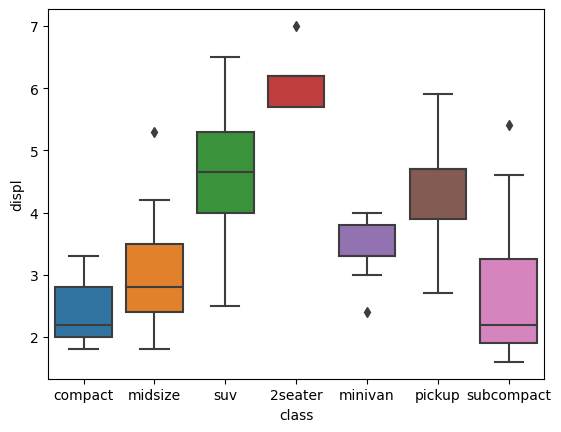

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x='class', y='displ')

And why not a violinplot to finish up?

<AxesSubplot:xlabel='class', ylabel='displ'>

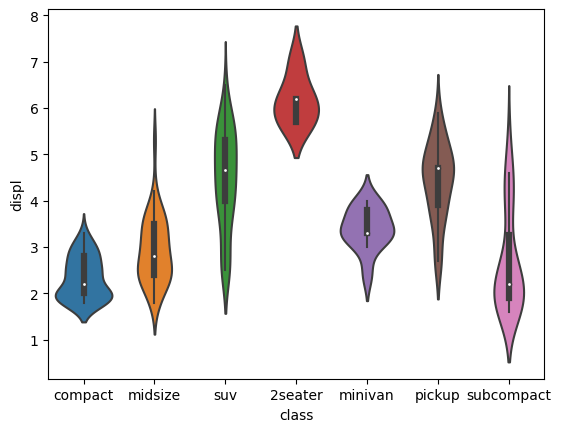

In [ ]:
sns.violinplot(x='class', y='displ', data=df)

skew =  0.5845614296189539 27.255267423014587 5.779062328376434


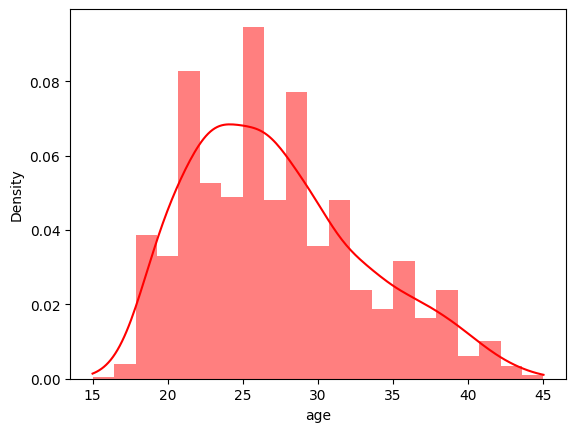

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
baby = pd.read_csv('http://people.hsc.edu/faculty-staff/blins/classes/spring17/math222/data/babies.csv')
df_mean = np.mean(baby["age"])
df_std = np.std(baby["age"])
print('skew = ', baby['age'].skew(), df_mean, df_std)
sns.histplot(baby["age"], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show() 

## Outliers

Outliers are datapoints that lie outside of the scope of the rest of the data. An outlier is a data point that differs significantly from other observations.

(1000, 12)

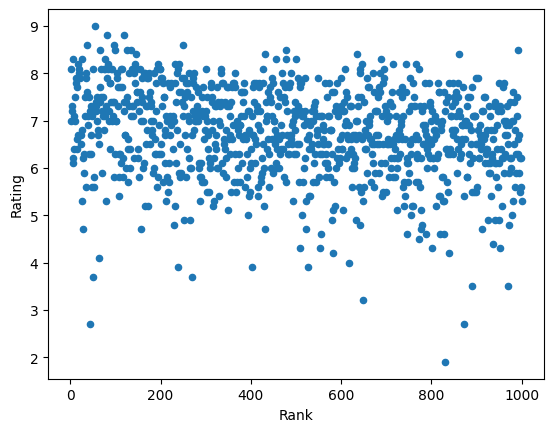

In [ ]:
df_movies.plot.scatter(x='Rank',y='Rating')
df_movies.shape

<AxesSubplot:>

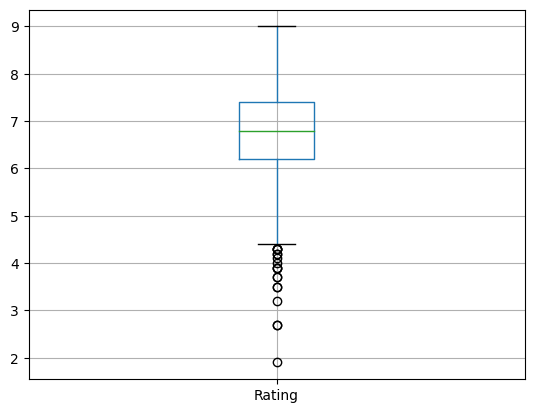

In [ ]:
import matplotlib.pyplot as plt
df_movies.boxplot(column=['Rating'])

A sample outlier function that returns us the lowerbound and upperbound values.​

In [49]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(df_movies.Rating)
print("lowerbound= ",lowerbound,"upperbound= ",upperbound)
#df_movies[(df_movies.Rating < lowerbound)].head(5)
no_outlier = df_movies[(df_movies.Rating > lowerbound) & (df_movies.Rating < upperbound)]
outliers = df_movies[(df_movies.Rating < lowerbound) | (df_movies.Rating > upperbound)]
print("sample shape= ", df_movies.shape)
print("number of samples that are not outliers= ",no_outlier.shape)
print("number of outliers= ",outliers.shape)

lowerbound=  4.4 upperbound=  9.200000000000001
sample shape=  (981, 12)
number of samples that are not outliers=  (980, 12)
number of outliers=  (0, 12)


The scatter plot after outlier removal:

(981, 12)

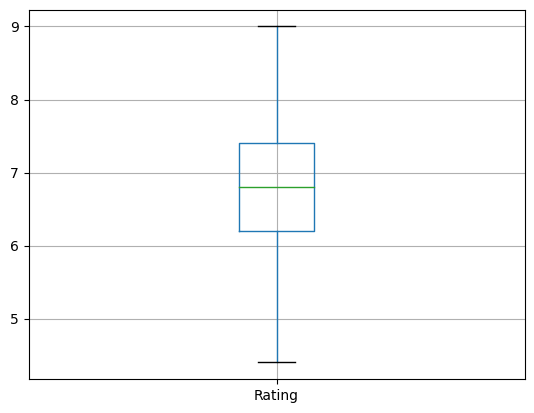

In [50]:
df_movies.drop(df_movies[ (df_movies.Rating > upperbound) | (df_movies.Rating < lowerbound) ].index , inplace=True)
df_movies.boxplot(column=['Rating'])
df_movies.shape